## Plots for the analysis panel
1. degree distribution
2. powerlaw
3. TODO: in/out flow over time 
4. eigenvector vs indegree centrality correlation
5. Correlation matrix
6. HDI vs #refugees



In [3]:
import pandas as pd
from pandas import DataFrame
import numpy as np
from matplotlib import pyplot as plt

import networkx as nx
import operator
import powerlaw

pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings('ignore')



In [4]:
df = pd.read_csv('../data/unhcr_time_series_normalized.csv')

from_to_values = df.groupby(["origin",'destination'])['value'].sum().reset_index().sort_values("value", ascending=False)
#print(from_to_values)


edge_list=from_to_values[['origin', 'destination', 'value']]
edges = list(map(tuple, list(edge_list.values)))
DG = nx.DiGraph()
DG.add_weighted_edges_from(edges)



### Indegree distribution

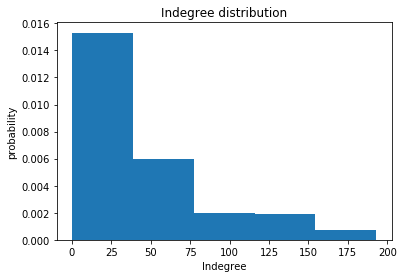

In [5]:
x = [d for n, d in DG.in_degree()]
#print(x)
num_bins =5

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)
plt.title('Indegree distribution')
plt.xlabel('Indegree')
plt.ylabel('probability')
plt.show()

### Outdegree distribution

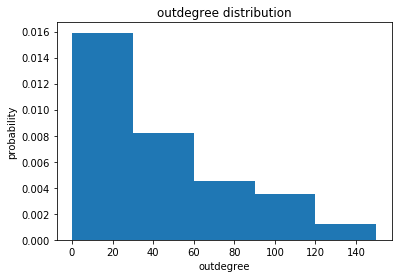

In [6]:
x = [d for n, d in DG.out_degree()]
#print(x)
num_bins =5

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)
plt.title('outdegree distribution')
plt.xlabel('outdegree')
plt.ylabel('probability')
plt.show()

### Powerlaw for origins

<Figure size 1296x576 with 0 Axes>

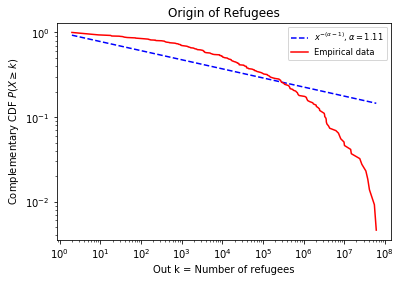

alpha=  1.1075203141462449   sigma=  0.0072989545221011825


In [7]:
origin = df.groupby(["origin"])["value"].agg(['sum'])
origin = origin.sort_values(['sum'], ascending=False)

degree_values =  origin['sum'].tolist()   #  sorted(set(degrees.values()))

plt.figure(figsize=(18,8));

lables = [r'$x^{-( \alpha-1)}, \alpha = 1.11$', "Empirical data"]


fit = powerlaw.Fit(np.array(degree_values)+1,xmin=1,discrete=False)
fit.power_law.plot_ccdf( color= 'b',linestyle='--',label='fit ccdf')
fit.plot_ccdf( color= 'r')
plt.title('Origin of Refugees')
plt.xlabel('Out k = Number of refugees')
plt.ylabel('Complementary CDF '+ r'$P(X\geq k)$')
plt.legend(lables, loc='best', fontsize = 'small')

plt.show()
print('alpha= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma)

### Powerlaw for destinations

<Figure size 1296x576 with 0 Axes>

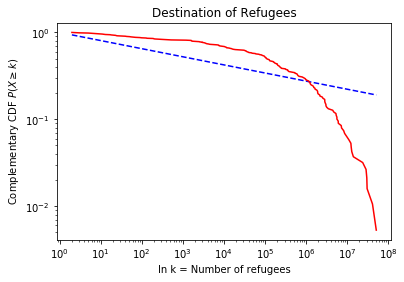

alpha=  1.0933669066316518   sigma=  0.006791443127673315


In [8]:
destination = df.groupby(["destination"])["value"].agg(['sum'])
destination = destination.sort_values(['sum'], ascending=False)


degree_values =  destination['sum'].tolist()   #  sorted(set(degrees.values()))


plt.figure(figsize=(18,8));

#lables = [r'$x^{-( \alpha-1)}, \alpha = 1.11$', "Empirical data"]


fit = powerlaw.Fit(np.array(degree_values)+1,xmin=1,discrete=False)
fit.power_law.plot_ccdf( color= 'b',linestyle='--',label='fit ccdf')
fit.plot_ccdf( color= 'r')
plt.title('Destination of Refugees')
plt.xlabel('In k = Number of refugees')
plt.ylabel('Complementary CDF '+ r'$P(X\geq k)$')
#plt.legend(lables, loc='best', fontsize = 'small')

plt.show()
print('alpha= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma)

### Indegree vs eigenvector

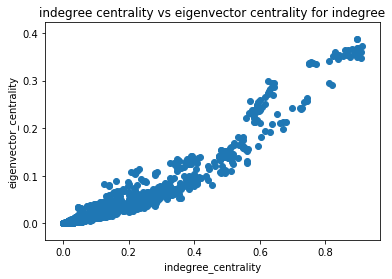

In [15]:
df = pd.read_csv("../data/country_year_features_merged.csv")


x = df.indegree_centrality
y = df.eigenvector_centrality

plt.scatter(x,y)

plt.title("indegree centrality vs eigenvector centrality for indegree")
plt.ylabel("eigenvector_centrality")
plt.xlabel("indegree_centrality")



plt.show()

### outdegree vs eigenvector

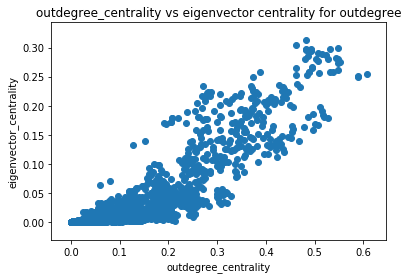

In [16]:
x = df.outdegree_centrality
y = df.eigenvector_centrality_out

plt.scatter(x,y)

plt.title("outdegree_centrality vs eigenvector centrality for outdegree")
plt.ylabel("eigenvector_centrality")
plt.xlabel("outdegree_centrality")



plt.show()

### correlation matrix

In [11]:
df.hdi_value = df.hdi_value.astype(str)
df.hdi_value = df.hdi_value.str.replace(',','.')
df.hdi_value = df.hdi_value.astype(float)

df.hdi_rank = df.hdi_rank.astype(float)


df.fgi_rank = df.fgi_rank.astype(str)
df.fgi_rank = df.fgi_rank.str.replace('n','0')
df.fgi_rank = df.fgi_rank.str.replace('a','0')
df.fgi_rank = df.fgi_rank.astype(float)

df.fgi_value = df.fgi_value.astype(float)

df.hfi_value = df.hfi_value.astype(str)
df.hfi_value = df.hfi_value.str.replace('-','0')
df.hfi_value = df.hfi_value.astype(float)

df.hfi_rank = df.hfi_rank.astype(str)
df.hfi_rank = df.hfi_rank.str.replace('-','0')
df.hfi_rank = df.hfi_rank.astype(float)

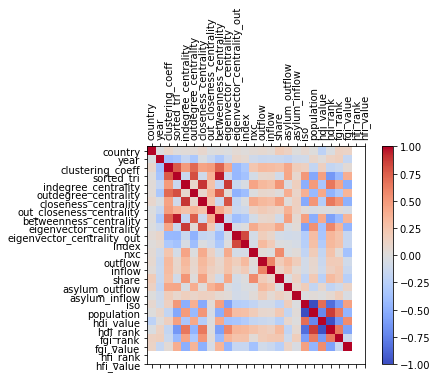

In [12]:
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()



### HDI vs refugees inflow

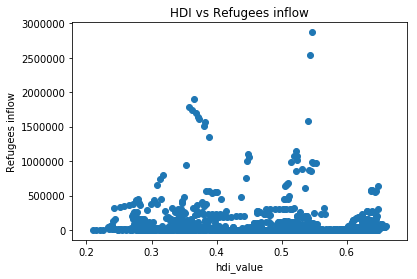

In [13]:
df.fillna(df.mean())
x = df.hdi_value
y = df.inflow

plt.scatter(x,y)

plt.title("HDI vs Refugees inflow")
plt.ylabel("Refugees inflow")
plt.xlabel("hdi_value")



plt.show()

### HDI vs refugees outflow

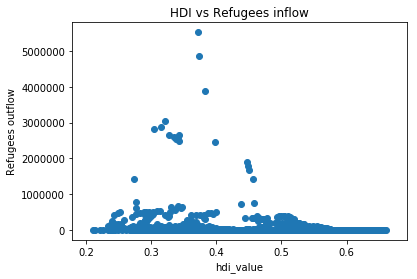

In [14]:
x = df.hdi_value
y = df.outflow

plt.scatter(x,y)

plt.title("HDI vs Refugees inflow")
plt.ylabel("Refugees outflow")
plt.xlabel("hdi_value")



plt.show()